# Importar Librerias

In [12]:
import re
import ast
import math
import string
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from wordcloud import WordCloud
from sklearn.preprocessing import MultiLabelBinarizer
from gensim.corpora.textcorpus import strip_multiple_whitespaces

# For word lemmitization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings("ignore")

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

[nltk_data] Downloading package wordnet to /Users/natalia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load Data

In [13]:
movies_training = pd.read_csv("./Competencia/datos/dataTraining.csv", sep="," , index_col=0)
movies_training.head()

year                      title  \
3107  2003                       Most   
900   2008  How to Be a Serial Killer   
6724  1941             A Woman's Face   
4704  1954            Executive Suite   
2582  1990              Narrow Margin   

                                                   plot  \
3107  most is the story of a single father who takes...   
900   a serial killer decides to teach the secrets o...   
6724  in sweden ,  a female blackmailer with a disfi...   
4704  in a friday afternoon in new york ,  the presi...   
2582  in los angeles ,  the editor of a publishing h...   

                                  genres  rating  
3107                  ['Short', 'Drama']     8.0  
900        ['Comedy', 'Crime', 'Horror']     5.6  
6724  ['Drama', 'Film-Noir', 'Thriller']     7.2  
4704                           ['Drama']     7.4  
2582     ['Action', 'Crime', 'Thriller']     6.6

In [14]:
movies_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7895 entries, 3107 to 215
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    7895 non-null   int64  
 1   title   7895 non-null   object 
 2   plot    7895 non-null   object 
 3   genres  7895 non-null   object 
 4   rating  7895 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 370.1+ KB


# Pre-Processing - Label Data

In [15]:
movies_training['genres_process']=movies_training['genres'].apply(lambda x: ast.literal_eval(x))
movies_training

year                              title  \
3107  2003                               Most   
900   2008          How to Be a Serial Killer   
6724  1941                     A Woman's Face   
4704  1954                    Executive Suite   
2582  1990                      Narrow Margin   
...    ...                                ...   
8417  2010                 Our Family Wedding   
1592  1984                Conan the Destroyer   
1723  1955                             Kismet   
7605  1982                 The Secret of NIMH   
215   2009  Tinker Bell and the Lost Treasure   

                                                   plot  \
3107  most is the story of a single father who takes...   
900   a serial killer decides to teach the secrets o...   
6724  in sweden ,  a female blackmailer with a disfi...   
4704  in a friday afternoon in new york ,  the presi...   
2582  in los angeles ,  the editor of a publishing h...   
...                                                 ...   
8417  " our marriage ,  their wedding .  "  it ' s l...   
1592  the wandering barbarian ,  conan ,  alongside ...   
1723  like a tale spun by scheherazade ,  kismet fol...   
7605  mrs .  brisby ,  a widowed mouse ,  lives in a...   
215   tinker bell journey far north of never land to...   

                                                 genres  rating  \
3107                                 ['Short', 'Drama']     8.0   
900                       ['Comedy', 'Crime', 'Horror']     5.6   
6724                 ['Drama', 'Film-Noir', 'Thriller']     7.2   
4704                                          ['Drama']     7.4   
2582                    ['Action', 'Crime', 'Thriller']     6.6   
...                                                 ...     ...   
8417                              ['Comedy', 'Romance']     4.9   
1592                 ['Action', 'Adventure', 'Fantasy']     5.8   
1723  ['Adventure', 'Musical', 'Fantasy', 'Comedy', ...     6.4   
7605  ['Animation', 'Adventure', 'Drama', 'Family', ...     7.6   
215     ['Animation', 'Adventure', 'Family', 'Fantasy']     6.8   

                                         genres_process  
3107                                     [Short, Drama]  
900                             [Comedy, Crime, Horror]  
6724                       [Drama, Film-Noir, Thriller]  
4704                                            [Drama]  
2582                          [Action, Crime, Thriller]  
...                                                 ...  
8417                                  [Comedy, Romance]  
1592                       [Action, Adventure, Fantasy]  
1723     [Adventure, Musical, Fantasy, Comedy, Romance]  
7605  [Animation, Adventure, Drama, Family, Fantasy,...  
215             [Animation, Adventure, Family, Fantasy]  

[7895 rows x 6 columns]

In [16]:
multilabel = MultiLabelBinarizer()
y = multilabel.fit_transform(movies_training['genres_process'])
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [17]:
multilabel.classes_

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'], dtype=object)

In [18]:
tags = pd.DataFrame(y, columns= multilabel.classes_)
tags

Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  \
0          0          0          0          0       0      0            0   
1          0          0          0          0       1      1            0   
2          0          0          0          0       0      0            0   
3          0          0          0          0       0      0            0   
4          1          0          0          0       0      1            0   
...      ...        ...        ...        ...     ...    ...          ...   
7890       0          0          0          0       1      0            0   
7891       1          1          0          0       0      0            0   
7892       0          1          0          0       1      0            0   
7893       0          1          1          0       0      0            0   
7894       0          1          1          0       0      0            0   

      Drama  Family  Fantasy  ...  Musical  Mystery  News  Romance  Sci-Fi  \
0         1       0        0  ...        0        0     0        0       0   
1         0       0        0  ...        0        0     0        0       0   
2         1       0        0  ...        0        0     0        0       0   
3         1       0        0  ...        0        0     0        0       0   
4         0       0        0  ...        0        0     0        0       0   
...     ...     ...      ...  ...      ...      ...   ...      ...     ...   
7890      0       0        0  ...        0        0     0        1       0   
7891      0       0        1  ...        0        0     0        0       0   
7892      0       0        1  ...        1        0     0        1       0   
7893      1       1        1  ...        0        0     0        0       1   
7894      0       1        1  ...        0        0     0        0       0   

      Short  Sport  Thriller  War  Western  
0         1      0         0    0        0  
1         0      0         0    0        0  
2         0      0         1    0        0  
3         0      0         0    0        0  
4         0      0         1    0        0  
...     ...    ...       ...  ...      ...  
7890      0      0         0    0        0  
7891      0      0         0    0        0  
7892      0      0         0    0        0  
7893      0      0         0    0        0  
7894      0      0         0    0        0  

[7895 rows x 24 columns]

In [19]:
data = movies_training[['title', 'plot']].reset_index(drop=True)
data_train = pd.concat([data, tags], axis=1)
data_train.head()


title  \
0                       Most   
1  How to Be a Serial Killer   
2             A Woman's Face   
3            Executive Suite   
4              Narrow Margin   

                                                plot  Action  Adventure  \
0  most is the story of a single father who takes...       0          0   
1  a serial killer decides to teach the secrets o...       0          0   
2  in sweden ,  a female blackmailer with a disfi...       0          0   
3  in a friday afternoon in new york ,  the presi...       0          0   
4  in los angeles ,  the editor of a publishing h...       1          0   

   Animation  Biography  Comedy  Crime  Documentary  Drama  ...  Musical  \
0          0          0       0      0            0      1  ...        0   
1          0          0       1      1            0      0  ...        0   
2          0          0       0      0            0      1  ...        0   
3          0          0       0      0            0      1  ...        0   
4          0          0       0      1            0      0  ...        0   

   Mystery  News  Romance  Sci-Fi  Short  Sport  Thriller  War  Western  
0        0     0        0       0      1      0         0    0        0  
1        0     0        0       0      0      0         0    0        0  
2        0     0        0       0      0      0         1    0        0  
3        0     0        0       0      0      0         0    0        0  
4        0     0        0       0      0      0         1    0        0  

[5 rows x 26 columns]

## Tipos de datos - Null Data

In [20]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7895 entries, 0 to 7894
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        7895 non-null   object
 1   plot         7895 non-null   object
 2   Action       7895 non-null   int64 
 3   Adventure    7895 non-null   int64 
 4   Animation    7895 non-null   int64 
 5   Biography    7895 non-null   int64 
 6   Comedy       7895 non-null   int64 
 7   Crime        7895 non-null   int64 
 8   Documentary  7895 non-null   int64 
 9   Drama        7895 non-null   int64 
 10  Family       7895 non-null   int64 
 11  Fantasy      7895 non-null   int64 
 12  Film-Noir    7895 non-null   int64 
 13  History      7895 non-null   int64 
 14  Horror       7895 non-null   int64 
 15  Music        7895 non-null   int64 
 16  Musical      7895 non-null   int64 
 17  Mystery      7895 non-null   int64 
 18  News         7895 non-null   int64 
 19  Romance      7895 non-null 

<AxesSubplot:>

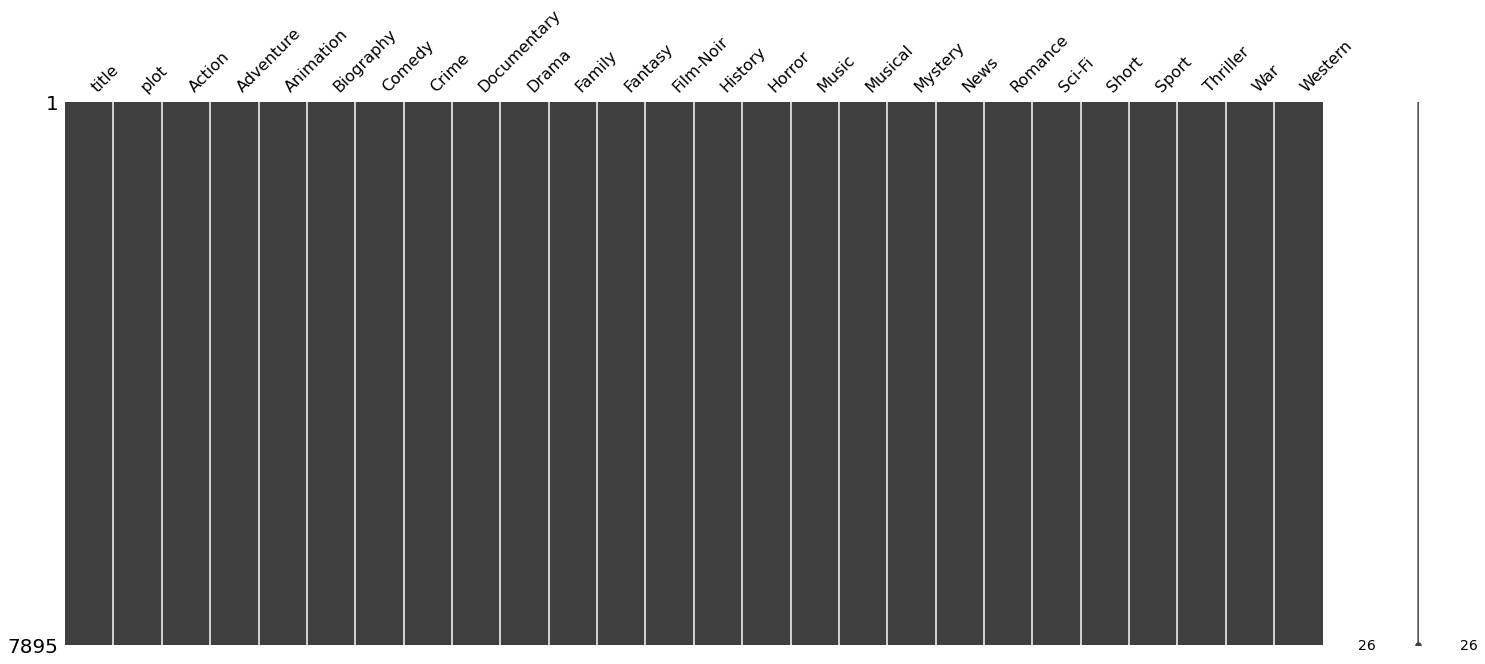

In [21]:
msno.matrix(data_train)


Se verifica que no hay valores perdidos

## Conversión de columnas categóricas

Convertimos todo el conjunto de características de género(salidas) en tipos categóricos.

In [22]:
category = data_train.columns.drop(['title', 'plot'])
for col in tags:
    data_train[col] = data_train[col].astype('category')

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7895 entries, 0 to 7894
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   title        7895 non-null   object  
 1   plot         7895 non-null   object  
 2   Action       7895 non-null   category
 3   Adventure    7895 non-null   category
 4   Animation    7895 non-null   category
 5   Biography    7895 non-null   category
 6   Comedy       7895 non-null   category
 7   Crime        7895 non-null   category
 8   Documentary  7895 non-null   category
 9   Drama        7895 non-null   category
 10  Family       7895 non-null   category
 11  Fantasy      7895 non-null   category
 12  Film-Noir    7895 non-null   category
 13  History      7895 non-null   category
 14  Horror       7895 non-null   category
 15  Music        7895 non-null   category
 16  Musical      7895 non-null   category
 17  Mystery      7895 non-null   category
 18  News         7895 non-null  

## Exploración Data

In [23]:
sum_genre = pd.DataFrame(tags[data_train.columns.drop(['title', 'plot'])].sum()).reset_index()
sum_genre.columns = ['Genre', 'Total']
sum_genre

Genre  Total
0        Action   1303
1     Adventure   1024
2     Animation    260
3     Biography    373
4        Comedy   3046
5         Crime   1447
6   Documentary    419
7         Drama   3965
8        Family    682
9       Fantasy    707
10    Film-Noir    168
11      History    273
12       Horror    954
13        Music    341
14      Musical    271
15      Mystery    759
16         News      7
17      Romance   1892
18       Sci-Fi    723
19        Short     92
20        Sport    261
21     Thriller   2024
22          War    348
23      Western    237

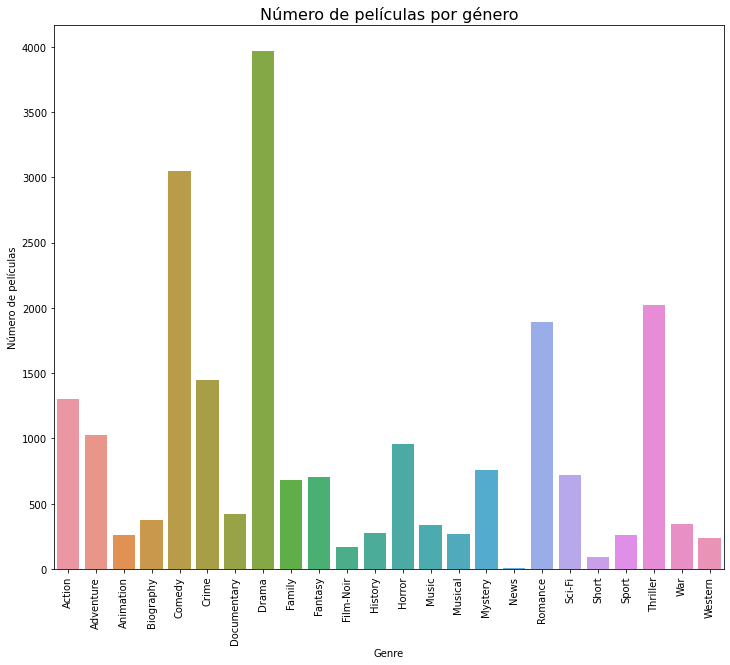

In [24]:
f, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.barplot(data=sum_genre, x='Genre', y='Total', axes=ax)
ax.set(ylabel='Número de películas')
plt.title('Número de películas por género', loc='center', fontdict={'fontsize':16})
plt.xticks(rotation=90)
plt.show()


Observaciones

* Las películas de género más bajas son Animation, Biography, Documentary, short and news.
* Las películas de género más altas son Drama (3965 películas), seguidas de Comedia (3046 películas) y Thriller (2024 películas )

## Número de géneros por película

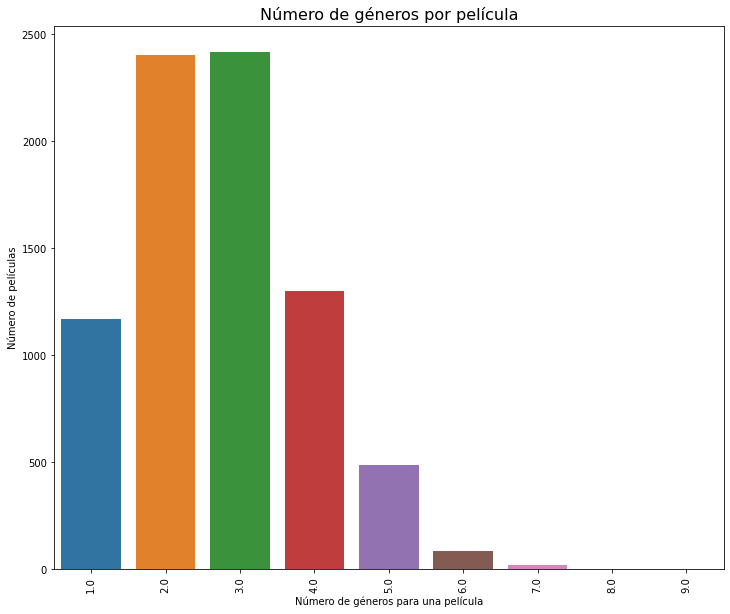

In [25]:
sum_movie = data_train[category].sum(axis=1)
df_genres_per_movie = pd.DataFrame({'title': data_train.title, 'num_genres':sum_movie}).groupby('num_genres').count()
f, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.barplot(data=df_genres_per_movie, x=df_genres_per_movie.index, y='title', axes=ax)
ax.set(xlabel='Número de géneros para una película', ylabel='Número de películas')
plt.title('Número de géneros por película', loc='center', fontdict={'fontsize':16})
plt.xticks(rotation=90)
plt.show()

In [26]:
print('En promedio, las películas se clasifican en {0:.2f} géneros'.format(sum_movie.mean()))
print('Número de películas con mas de 4 géneros. = {0}'.format(len(sum_movie[sum_movie==4])))

En promedio, las películas se clasifican en 2.73 géneros
Número de películas con mas de 4 géneros. = 1300


## WordCloud

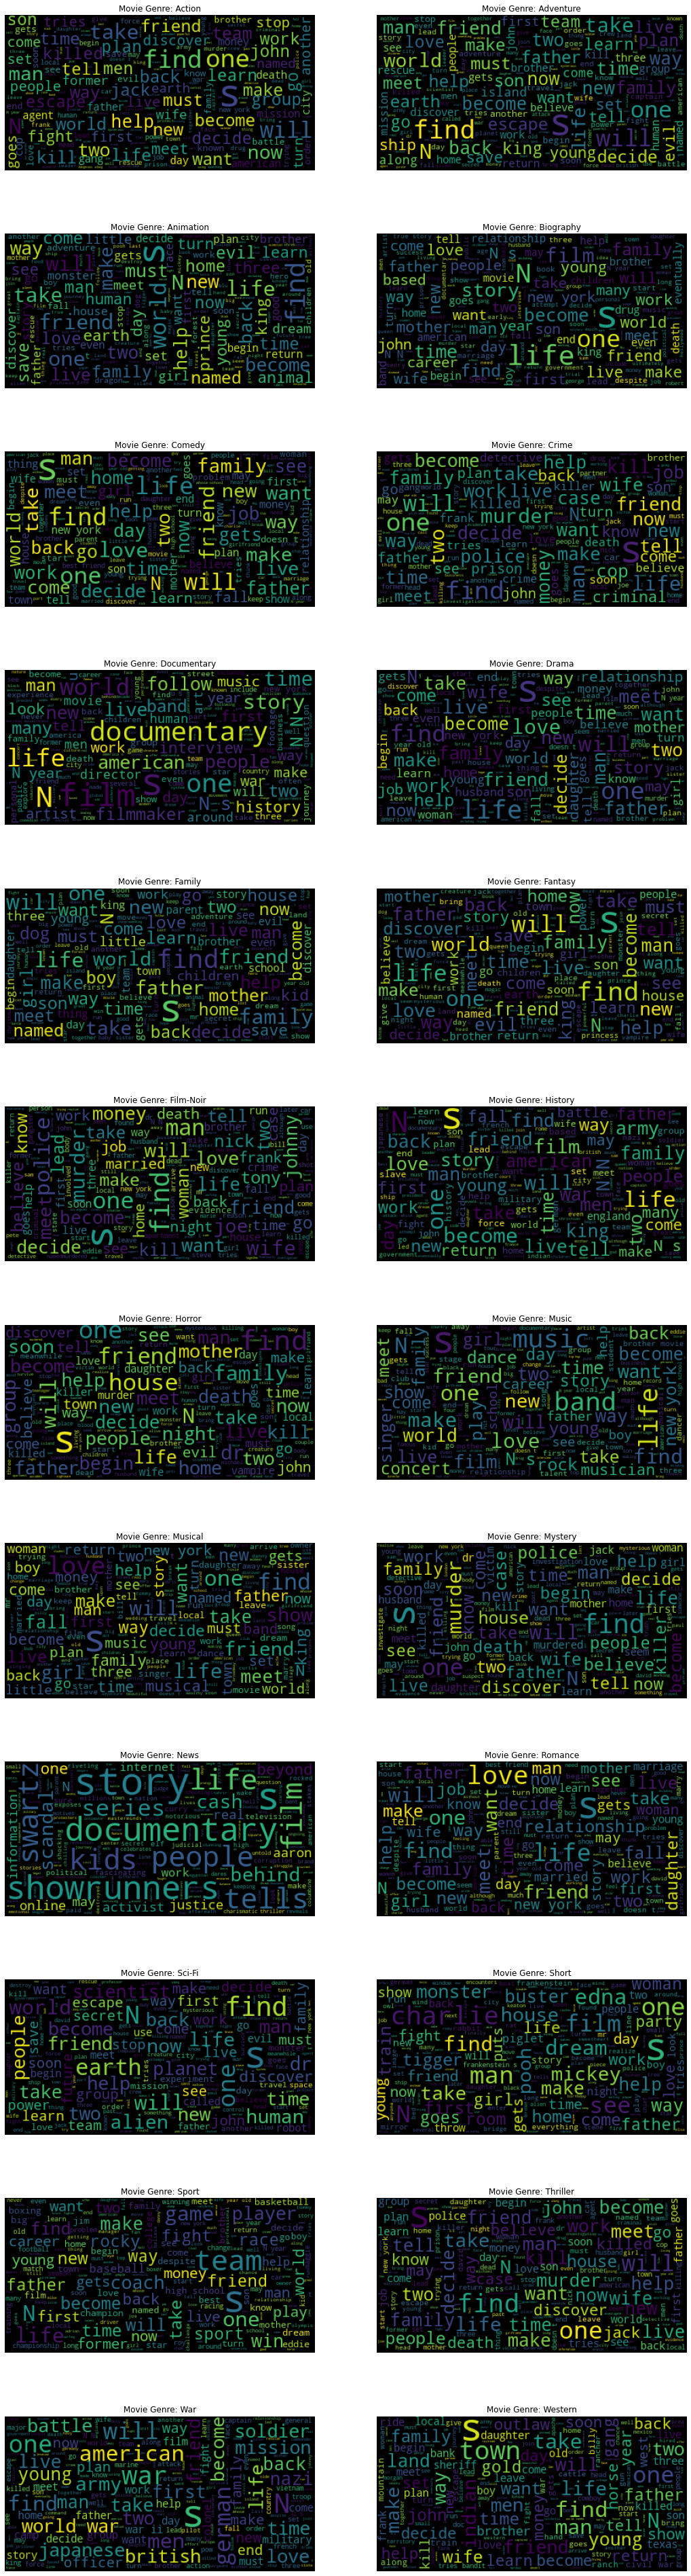

In [27]:
fig = plt.figure(figsize=(18, 70))
num_cols = 2
num_rows = math.ceil(len(category)/num_cols)
for idx, col in enumerate(category):
    wordcloud = WordCloud(max_font_size=50).generate(' '.join(data_train[data_train[col]==1]['plot']))
    ax = fig.add_subplot(num_rows, num_cols, idx+1)
    ax.imshow(wordcloud)
    ax.axis("off")
    ax.set(title='Movie Genre: {0}'.format(col))
plt.show()

## Análisis de correlación de género
Ahora veamos qué géneros están mayormente correlacionados. En otras palabras, si una película es, por ejemplo, Acción, ¿cuáles son los otros géneros en los que puede caer?

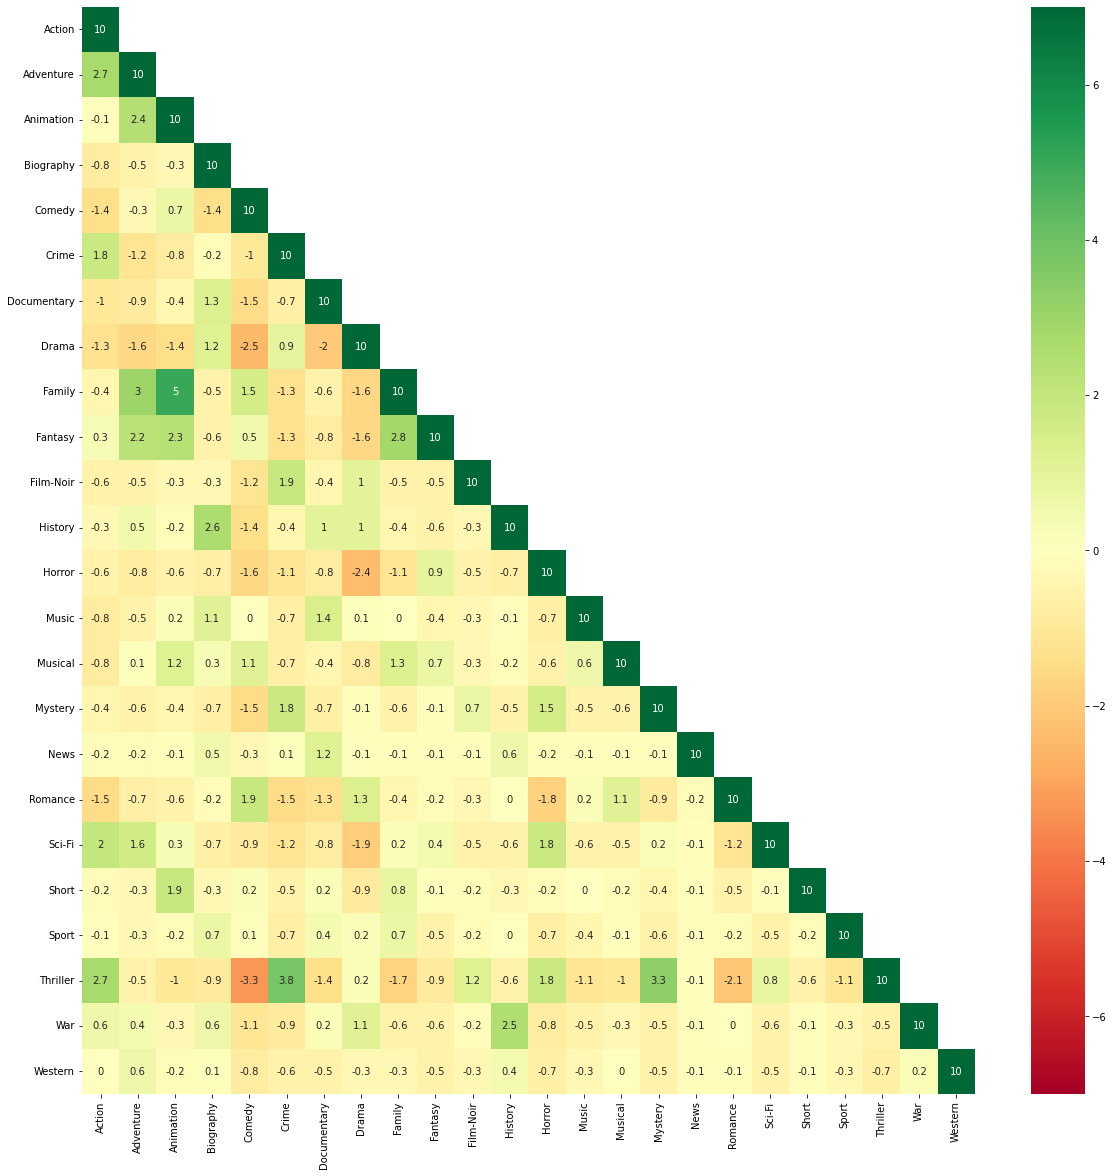

In [28]:
# Heatmap relative to all numeric columns
corr_matrix = (data_train[category].astype('int')).corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False
corr_matrix = (100*corr_matrix//1)/10

fig = plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, mask=mask, annot=True, cbar=True, vmax=7, vmin=-7, cmap='RdYlGn')
plt.show()

Las siguientes categorías de género muestran una fuerte correlación positiva entre sí
* Acción, Aventura y Ciencia Ficción
* Animación, Fantasía y Familia
* Crimen, Thriller, Misterio y Drama
* Biografía, Documental e Historia
* drama y romanticismo
* Programa de juegos y telerrealidad
* Terror, Thriller y Fantasia
* Programa de entrevistas y noticias
* Guerra e Historia

Las siguientes categorías de género muestran una fuerte correlación negativa entre sí
* Animación y Teatro
* Comedia con Documental y Reality-TV
* Documental con Comedia, Drama y Romance
* Drama con Animación, Reality TV y Comedia

## Preprocesamiento de los datos

Aquí limpiamos nuestros datos (trama de la película) usando las siguientes técnicas de preprocesamiento

In [29]:
nlp = spacy.load('en_core_web_trf')

In [30]:
def preprocess_text(text):
    """
    Function to process the the text text and tranform it into format usable by Machine learning models
    """
    # remove line breaks
    text = text.replace('\n', ' ')
    # to convert all the characters of the text into lower case alphabets
    text = text.lower()
    #remove numbers
    text = re.sub(r'[0-9]+', '', text) #remove numbers
    # Remove urls from the texts
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    #remove emails
    text = re.sub('\S*@\S*\s?', '', text)
    # Remove user related references from the texts:: '@' and '#' 
    text = re.sub(r'\@\w+|\#','', text)
    #remove spaces
    text = strip_multiple_whitespaces(text) 
    # Remove punctuations from the texts
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Lemmatizerr
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='v') for w in text.split()]

    joined_text = " ".join(lemma_words)
    return joined_text

In [31]:
data_train['plot_clean'] = data_train['plot'].apply(preprocess_text)

## Train-Test Split

In [32]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_train, random_state=42, test_size=0.15, shuffle=True)

print(train.shape)
print(test.shape)

(6710, 27)
(1185, 27)


## TF-IDF

In [33]:
train_text = train['plot_clean']
test_text = test['plot_clean']

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [35]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['title','plot','plot_clean'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['title','plot','plot_clean'], axis=1)

## Multi-Label Classification

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [160]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
accuracy=0
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for cat in category.tolist():
    printmd('**Processing {} Multilabel Clasification...**'.format(cat))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[cat])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[cat], prediction)))
    print('Test Recall is {}'.format(recall_score(test[cat], prediction)))
    print('Test f1_score is {}'.format(f1_score(test[cat], prediction)))
    print("\n")



**Processing Action Multilabel Clasification...**

Test accuracy is 0.8329113924050633
Test Recall is 0.0
Test f1_score is 0.0




**Processing Adventure Multilabel Clasification...**

Test accuracy is 0.8616033755274262
Test Recall is 0.0
Test f1_score is 0.0




**Processing Animation Multilabel Clasification...**

Test accuracy is 0.9586497890295359
Test Recall is 0.0
Test f1_score is 0.0




**Processing Biography Multilabel Clasification...**

Test accuracy is 0.9426160337552743
Test Recall is 0.0
Test f1_score is 0.0




**Processing Comedy Multilabel Clasification...**

Test accuracy is 0.7274261603375527
Test Recall is 0.4226579520697168
Test f1_score is 0.5457102672292545




**Processing Crime Multilabel Clasification...**

Test accuracy is 0.8236286919831224
Test Recall is 0.014150943396226415
Test f1_score is 0.02790697674418605




**Processing Documentary Multilabel Clasification...**

Test accuracy is 0.9535864978902954
Test Recall is 0.0
Test f1_score is 0.0




**Processing Drama Multilabel Clasification...**

Test accuracy is 0.6886075949367089
Test Recall is 0.5445205479452054
Test f1_score is 0.6328358208955224




**Processing Family Multilabel Clasification...**

Test accuracy is 0.8953586497890296
Test Recall is 0.0
Test f1_score is 0.0




**Processing Fantasy Multilabel Clasification...**

Test accuracy is 0.9071729957805907
Test Recall is 0.0
Test f1_score is 0.0




**Processing Film-Noir Multilabel Clasification...**

Test accuracy is 0.9704641350210971
Test Recall is 0.0
Test f1_score is 0.0




**Processing History Multilabel Clasification...**

Test accuracy is 0.9696202531645569
Test Recall is 0.0
Test f1_score is 0.0




**Processing Horror Multilabel Clasification...**

Test accuracy is 0.890295358649789
Test Recall is 0.0
Test f1_score is 0.0




**Processing Music Multilabel Clasification...**

Test accuracy is 0.9459915611814346
Test Recall is 0.0
Test f1_score is 0.0




**Processing Musical Multilabel Clasification...**

Test accuracy is 0.9670886075949368
Test Recall is 0.0
Test f1_score is 0.0




**Processing Mystery Multilabel Clasification...**

Test accuracy is 0.9113924050632911
Test Recall is 0.0
Test f1_score is 0.0




**Processing News Multilabel Clasification...**

Test accuracy is 1.0
Test Recall is 0.0
Test f1_score is 0.0




**Processing Romance Multilabel Clasification...**

Test accuracy is 0.7637130801687764
Test Recall is 0.044673539518900345
Test f1_score is 0.08496732026143791




**Processing Sci-Fi Multilabel Clasification...**

Test accuracy is 0.8953586497890296
Test Recall is 0.0
Test f1_score is 0.0




**Processing Short Multilabel Clasification...**

Test accuracy is 0.9881856540084388
Test Recall is 0.0
Test f1_score is 0.0




**Processing Sport Multilabel Clasification...**

Test accuracy is 0.9645569620253165
Test Recall is 0.0
Test f1_score is 0.0




**Processing Thriller Multilabel Clasification...**

Test accuracy is 0.7527426160337553
Test Recall is 0.023333333333333334
Test f1_score is 0.04560260586319218




**Processing War Multilabel Clasification...**

Test accuracy is 0.9561181434599156
Test Recall is 0.0
Test f1_score is 0.0




**Processing Western Multilabel Clasification...**

Test accuracy is 0.9611814345991562
Test Recall is 0.0
Test f1_score is 0.0


CPU times: user 688 ms, sys: 558 ms, total: 1.25 s
Wall time: 27.7 s


In [42]:
%%time

from sklearn.linear_model import SGDClassifier

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(SGDClassifier(), n_jobs=-1)),
            ])

for cat in category.tolist():
    printmd('**Processing {} Multilabel Clasification...**'.format(cat))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[cat])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[cat], prediction)))
    print('Test Recall is {}'.format(recall_score(test[cat], prediction)))
    print('Test f1_score is {}'.format(f1_score(test[cat], prediction)))
    print("\n")

**Processing Action Multilabel Clasification...**

Test accuracy is 0.850632911392405
Test Recall is 0.13131313131313133
Test f1_score is 0.22707423580786026




**Processing Adventure Multilabel Clasification...**

Test accuracy is 0.8725738396624473
Test Recall is 0.08536585365853659
Test f1_score is 0.1564245810055866




**Processing Animation Multilabel Clasification...**

Test accuracy is 0.960337552742616
Test Recall is 0.04081632653061224
Test f1_score is 0.07843137254901959




**Processing Biography Multilabel Clasification...**

Test accuracy is 0.9426160337552743
Test Recall is 0.0
Test f1_score is 0.0




**Processing Comedy Multilabel Clasification...**

Test accuracy is 0.7510548523206751
Test Recall is 0.5925925925925926
Test f1_score is 0.6483909415971395




**Processing Crime Multilabel Clasification...**

Test accuracy is 0.8464135021097047
Test Recall is 0.18396226415094338
Test f1_score is 0.3




**Processing Documentary Multilabel Clasification...**

Test accuracy is 0.9687763713080169
Test Recall is 0.32727272727272727
Test f1_score is 0.4931506849315069




**Processing Drama Multilabel Clasification...**

Test accuracy is 0.6852320675105485
Test Recall is 0.5873287671232876
Test f1_score is 0.6477809254013219




**Processing Family Multilabel Clasification...**

Test accuracy is 0.8987341772151899
Test Recall is 0.03225806451612903
Test f1_score is 0.0625




**Processing Fantasy Multilabel Clasification...**

Test accuracy is 0.9139240506329114
Test Recall is 0.07272727272727272
Test f1_score is 0.13559322033898305




**Processing Film-Noir Multilabel Clasification...**

Test accuracy is 0.9704641350210971
Test Recall is 0.0
Test f1_score is 0.0




**Processing History Multilabel Clasification...**

Test accuracy is 0.9696202531645569
Test Recall is 0.0
Test f1_score is 0.0




**Processing Horror Multilabel Clasification...**

Test accuracy is 0.8987341772151899
Test Recall is 0.08461538461538462
Test f1_score is 0.15492957746478875




**Processing Music Multilabel Clasification...**

Test accuracy is 0.9518987341772152
Test Recall is 0.109375
Test f1_score is 0.19718309859154928




**Processing Musical Multilabel Clasification...**

Test accuracy is 0.9670886075949368
Test Recall is 0.0
Test f1_score is 0.0




**Processing Mystery Multilabel Clasification...**

Test accuracy is 0.9130801687763713
Test Recall is 0.01904761904761905
Test f1_score is 0.03738317757009346




**Processing News Multilabel Clasification...**

Test accuracy is 1.0
Test Recall is 0.0
Test f1_score is 0.0




**Processing Romance Multilabel Clasification...**

Test accuracy is 0.7839662447257384
Test Recall is 0.16494845360824742
Test f1_score is 0.27272727272727276




**Processing Sci-Fi Multilabel Clasification...**

Test accuracy is 0.9063291139240506
Test Recall is 0.11290322580645161
Test f1_score is 0.20143884892086333




**Processing Short Multilabel Clasification...**

Test accuracy is 0.9881856540084388
Test Recall is 0.0
Test f1_score is 0.0




**Processing Sport Multilabel Clasification...**

Test accuracy is 0.9670886075949368
Test Recall is 0.07142857142857142
Test f1_score is 0.13333333333333333




**Processing Thriller Multilabel Clasification...**

Test accuracy is 0.7789029535864979
Test Recall is 0.18333333333333332
Test f1_score is 0.29569892473118276




**Processing War Multilabel Clasification...**

Test accuracy is 0.960337552742616
Test Recall is 0.09615384615384616
Test f1_score is 0.17543859649122806




**Processing Western Multilabel Clasification...**

Test accuracy is 0.9611814345991562
Test Recall is 0.0
Test f1_score is 0.0


CPU times: user 518 ms, sys: 374 ms, total: 892 ms
Wall time: 6.03 s


In [161]:
%%time

from sklearn.naive_bayes import MultinomialNB

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None), n_jobs=-1)),
            ])

for cat in category.tolist():
    printmd('**Processing {} Multilabel Clasification...**'.format(cat))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[cat])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[cat], prediction)))
    print('Test Recall is {}'.format(recall_score(test[cat], prediction)))
    print('Test f1_score is {}'.format(f1_score(test[cat], prediction)))
    print("\n")

**Processing Action Multilabel Clasification...**

Test accuracy is 0.8329113924050633
Test Recall is 0.0
Test f1_score is 0.0




**Processing Adventure Multilabel Clasification...**

Test accuracy is 0.8616033755274262
Test Recall is 0.0
Test f1_score is 0.0




**Processing Animation Multilabel Clasification...**

Test accuracy is 0.9586497890295359
Test Recall is 0.0
Test f1_score is 0.0




**Processing Biography Multilabel Clasification...**

Test accuracy is 0.9426160337552743
Test Recall is 0.0
Test f1_score is 0.0




**Processing Comedy Multilabel Clasification...**

Test accuracy is 0.6168776371308017
Test Recall is 0.013071895424836602
Test f1_score is 0.025751072961373394




**Processing Crime Multilabel Clasification...**

Test accuracy is 0.8202531645569621
Test Recall is 0.0
Test f1_score is 0.0




**Processing Documentary Multilabel Clasification...**

Test accuracy is 0.9535864978902954
Test Recall is 0.0
Test f1_score is 0.0




**Processing Drama Multilabel Clasification...**

Test accuracy is 0.6894514767932489
Test Recall is 0.803082191780822
Test f1_score is 0.7182235834609494




**Processing Family Multilabel Clasification...**

Test accuracy is 0.8953586497890296
Test Recall is 0.0
Test f1_score is 0.0




**Processing Fantasy Multilabel Clasification...**

Test accuracy is 0.9071729957805907
Test Recall is 0.0
Test f1_score is 0.0




**Processing Film-Noir Multilabel Clasification...**

Test accuracy is 0.9704641350210971
Test Recall is 0.0
Test f1_score is 0.0




**Processing History Multilabel Clasification...**

Test accuracy is 0.9696202531645569
Test Recall is 0.0
Test f1_score is 0.0




**Processing Horror Multilabel Clasification...**

Test accuracy is 0.889451476793249
Test Recall is 0.0
Test f1_score is 0.0




**Processing Music Multilabel Clasification...**

Test accuracy is 0.9459915611814346
Test Recall is 0.0
Test f1_score is 0.0




**Processing Musical Multilabel Clasification...**

Test accuracy is 0.9670886075949368
Test Recall is 0.0
Test f1_score is 0.0




**Processing Mystery Multilabel Clasification...**

Test accuracy is 0.9113924050632911
Test Recall is 0.0
Test f1_score is 0.0




**Processing News Multilabel Clasification...**

Test accuracy is 1.0
Test Recall is 0.0
Test f1_score is 0.0




**Processing Romance Multilabel Clasification...**

Test accuracy is 0.7544303797468355
Test Recall is 0.0
Test f1_score is 0.0




**Processing Sci-Fi Multilabel Clasification...**

Test accuracy is 0.8953586497890296
Test Recall is 0.0
Test f1_score is 0.0




**Processing Short Multilabel Clasification...**

Test accuracy is 0.9881856540084388
Test Recall is 0.0
Test f1_score is 0.0




**Processing Sport Multilabel Clasification...**

Test accuracy is 0.9645569620253165
Test Recall is 0.0
Test f1_score is 0.0




**Processing Thriller Multilabel Clasification...**

Test accuracy is 0.7468354430379747
Test Recall is 0.0
Test f1_score is 0.0




**Processing War Multilabel Clasification...**

Test accuracy is 0.9561181434599156
Test Recall is 0.0
Test f1_score is 0.0




**Processing Western Multilabel Clasification...**

Test accuracy is 0.9611814345991562
Test Recall is 0.0
Test f1_score is 0.0


CPU times: user 1.06 s, sys: 1.21 s, total: 2.27 s
Wall time: 9.56 s


In [162]:
%%time

from sklearn.ensemble import RandomForestClassifier

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(RandomForestClassifier(), n_jobs=-1)),
            ])

for cat in category.tolist():
    printmd('**Processing {} Multilabel Clasification...**'.format(cat))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[cat])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[cat], prediction)))
    print('Test Recall is {}'.format(recall_score(test[cat], prediction)))
    print('Test f1_score is {}'.format(f1_score(test[cat], prediction)))
    print("\n")

**Processing Action Multilabel Clasification...**

Test accuracy is 0.8329113924050633
Test Recall is 0.0
Test f1_score is 0.0




**Processing Adventure Multilabel Clasification...**

Test accuracy is 0.8616033755274262
Test Recall is 0.0
Test f1_score is 0.0




**Processing Animation Multilabel Clasification...**

Test accuracy is 0.959493670886076
Test Recall is 0.02040816326530612
Test f1_score is 0.039999999999999994




**Processing Biography Multilabel Clasification...**

Test accuracy is 0.9426160337552743
Test Recall is 0.0
Test f1_score is 0.0




**Processing Comedy Multilabel Clasification...**

## Red Neuronal

In [107]:
import tensorflow as tf
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPool1D, Dropout,Conv1D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.utils.data_utils import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras import backend as K

In [139]:
maxlen = 200
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(data_train['plot_clean'])
sequences = tokenizer.texts_to_sequences(data_train['plot_clean'])
x = pad_sequences(sequences, maxlen=maxlen)

In [140]:
data_n = data_train[['plot','plot_clean', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']]
data_n.head()

plot  \
0  most is the story of a single father who takes...   
1  a serial killer decides to teach the secrets o...   
2  in sweden ,  a female blackmailer with a disfi...   
3  in a friday afternoon in new york ,  the presi...   
4  in los angeles ,  the editor of a publishing h...   

                                          plot_clean Action Adventure  \
0  most be the story of a single father who take ...      0         0   
1  a serial killer decide to teach the secrets of...      0         0   
2  in sweden a female blackmailer with a disfigur...      0         0   
3  in a friday afternoon in new york the presiden...      0         0   
4  in los angeles the editor of a publish house c...      1         0   

  Animation Biography Comedy Crime Documentary Drama  ... Musical Mystery  \
0         0         0      0     0           0     1  ...       0       0   
1         0         0      1     1           0     0  ...       0       0   
2         0         0      0     0           0     1  ...       0       0   
3         0         0      0     0           0     1  ...       0       0   
4         0         0      0     1           0     0  ...       0       0   

  News Romance Sci-Fi Short Sport Thriller War Western  
0    0       0      0     1     0        0   0       0  
1    0       0      0     0     0        0   0       0  
2    0       0      0     0     0        1   0       0  
3    0       0      0     0     0        0   0       0  
4    0       0      0     0     0        1   0       0  

[5 rows x 26 columns]

In [141]:
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [142]:
num_classes = y_train.shape[1]
max_words = len(tokenizer.word_index) + 1
print(f"Numero de clases:{num_classes}")
print(f"Max Words:{max_words}")

Numero de clases:24
Max Words:32467


In [88]:

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [150]:
model = Sequential()
model.add(Embedding(max_words, 64, input_length=maxlen))
#model.add(Dropout(0.2))
model.add(GlobalMaxPool1D())
model.add(Dense(num_classes, activation='sigmoid'))


In [151]:
model.compile(optimizer=Adam(0.015), loss='binary_crossentropy', metrics=['accuracy'])
callbacks = [
    EarlyStopping(patience=10),
    ModelCheckpoint(filepath='model-simple.h5', save_best_only=True)
]


history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=callbacks)

Epoch 1/30
277/277 [==============================] - 10s 31ms/step - loss: 0.2943 - accuracy: 0.2204 - val_loss: 0.2688 - val_accuracy: 0.2197
Epoch 2/30
277/277 [==============================] - 7s 26ms/step - loss: 0.2443 - accuracy: 0.3127 - val_loss: 0.2506 - val_accuracy: 0.2975
Epoch 3/30
277/277 [==============================] - 8s 30ms/step - loss: 0.2166 - accuracy: 0.3701 - val_loss: 0.2510 - val_accuracy: 0.3373
Epoch 4/30
277/277 [==============================] - 7s 26ms/step - loss: 0.1930 - accuracy: 0.4075 - val_loss: 0.2593 - val_accuracy: 0.2966
Epoch 5/30
277/277 [==============================] - 7s 27ms/step - loss: 0.1723 - accuracy: 0.4475 - val_loss: 0.2778 - val_accuracy: 0.3011
Epoch 6/30
277/277 [==============================] - 7s 26ms/step - loss: 0.1567 - accuracy: 0.4511 - val_loss: 0.2822 - val_accuracy: 0.2676
Epoch 7/30
277/277 [==============================] - 9s 34ms/step - loss: 0.1422 - accuracy: 0.4726 - val_loss: 0.3067 - val_accuracy: 0.276

## CNN

In [ ]:
filter_length = 300

model = Sequential()
model.add(Embedding(max_words, 32, input_length=maxlen))
#model.add(Dropout(0.5))
model.add(Conv1D(filter_length, 3, padding='same', activation='relu', strides=1))
model.add(GlobalMaxPool1D())
model.add(Dense(num_classes, activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

callbacks = [
    ReduceLROnPlateau(),
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)
]

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.3,
                    callbacks=callbacks)